# **Pendahuluan**


## ***Deskripsi***

Tindak penipuan dalam transaksi daring makin menjadi sumber kekhawatiran bagi masyarakat, terutama dengan peningkatan laporan yang signifikan. Berdasarkan data terbaru dari Pusat Pelaporan dan Analisis Transaksi Keuangan (PPATK), jumlah laporan transaksi keuangan mencurigakan (LKTM) telah mencapai angka mencengangkan sebanyak 130.472. Angka ini menunjukkan peningkatan yang besar, yakni 43,78% dari periode yang sama pada tahun sebelumnya yang tercatat sebanyak 90.742 laporan.

Dalam menghadapi masalah penipuan daring yang makin kompleks, peran ilmuwan data menjadi sangat penting. Anda dihadapkan pada tantangan untuk membantu mengurangi prevalensi kejadian penipuan serupa di masa yang akan datang. Melalui partisipasi dalam playground ini, tugas Anda bukan hanya mengidentifikasi karakteristik umum dari pelaku penipuan, tetapi juga mengembangkan model prediksi yang dapat secara akurat mengidentifikasi individu atau transaksi yang berpotensi melakukan penipuan berdasarkan data yang tersedia.
Dapatkah Anda menjawab tantangan ini?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ***Evaluasi***

Evaluasi
Submisi dievaluasi menggunakan metrik Balanced Accuracy Score.

$$\text{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right)$$


dengan TP adalah banyaknya true positive, TN banyaknya true negative, FP banyaknya false positive, dan FN banyaknya false negative.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ***Referensi***
**Sumber:**

Royalx. (2021, June 14). 8 Tips on Processing Online Payments for Small Businesses. Get Business Strategy. https://getbusinessstrategy.com/8-tips-on-processing-online-payments-for-small-businesses/

Laporan Transaksi Keuangan Mencurigakan Naik 43,78% pada 2023 | Databoks. (n.d.). Databoks.katadata.co.id. Retrieved June 14, 2024, from https://databoks.katadata.co.id/datapublish/2024/01/28/laporan-transaksi-keuangan-mencurigakan-naik-4378-pada-2023

eCommerce Fraud: The Ultimate Merchant’s Guide for 2023. (n.d.). Chargebacks911. https://chargebacks911.com/ecommerce-fraud/

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ***Dataset***

### **Train & Test**

| Nama Variabel             | Deskripsi                                                                 | Dtype   |
|---------------------------|---------------------------------------------------------------------------|---------|
| id_pengguna               | Identifikasi unik untuk setiap pengguna yang terdaftar di platform e-commerce. | int64   |
| waktu_pendaftaran_akun    | Waktu ketika pengguna mendaftar di platform e-commerce.                   | object  |
| waktu_pembelian           | Waktu ketika pengguna melakukan pembelian di platform e-commerce.         | object  |
| total_harga_pembelian     | Nilai transaksi dari pembelian yang dilakukan oleh pengguna.               | int64   |
| id_perangkat              | Identifikasi unik dari perangkat yang digunakan oleh pengguna untuk mengakses platform e-commerce. | object  |
| sumber                    | Sumber atau kanal dari mana pengguna menemukan atau mengakses platform e-commerce (misalnya iklan, pencarian organik, dll.). | object  |
| browser                   | Jenis peramban yang digunakan oleh pengguna untuk mengakses platform e-commerce. | object  |
| gender                    | Jenis kelamin pengguna yang terdaftar di platform e-commerce.             | object  |
| umur                      | Usia pengguna yang terdaftar di platform e-commerce.                      | int64   |
| alamat_IP                 | Alamat IP yang digunakan oleh perangkat pengguna saat mengakses platform e-commerce. | float64 |
| fraud                     | Klasifikasi transaksi apakah termasuk penipuan atau tidak. (Tidak ada dalam test.csv) | int64   |


### **IP Adress Mapping**


| Nama Variabel              | Deskripsi                                                                                          | Dtype   |
|----------------------------|----------------------------------------------------------------------------------------------------|---------|
| batas_bawah_alamat_IP       | Batas bawah rentang alamat IP yang digunakan untuk menentukan lokasi geografis pengguna.           | int64   |
| batas_atas_alamat_IP        | Batas atas rentang alamat IP yang digunakan untuk menentukan lokasi geografis pengguna.            | int64   |
| negara                     | Negara asal pengguna berdasarkan alamat IP yang digunakan saat mengakses platform e-commerce.       | object  |

# **Libraries**


```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
import seaborn as sns
import warnings 
from itertools import product
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.utils import class_weight
```

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# **Main Notebook**


In [219]:
import warnings 
warnings.filterwarnings('ignore') #ignore warnings

## **Import Libraries**

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
import seaborn as sns
from itertools import product
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.utils import class_weight

## **Assessing Data**

In [221]:
train = pd.read_csv('~/Documents/Code/Ristek Play Ground/Data/train.csv')
mapping = pd.read_csv('~/Documents/Code/Ristek Play Ground/Data//ip_address_mapping.csv')
test = pd.read_csv('~/Documents/Code/Ristek Play Ground/Data//test.csv')

### **Train Data**

In [222]:
train.head()

,id_pengguna,waktu_pendaftaran_akun,waktu_pembelian,total_harga_pembelian,id_perangkat,sumber,browser,gender,umur,alamat_IP,fraud
0,286873,6/7/2015 12:58,9/27/2015 16:32,14,DNTIEECGGDXHF,Iklan,Opera,F,38,2.417207e+08,0
1,244392,5/1/2015 15:29,8/27/2015 14:21,11,MECRFNJGDPGOB,SEO,Chrome,M,36,4.172794e+09,0
2,20720,3/29/2015 18:04,6/13/2015 6:50,52,WLTSYVLLASJOZ,SEO,Internet Explorer,M,26,1.113433e+09,0
3,198755,1/29/2015 0:49,2/17/2015 21:49,13,TWGNWOWURZFMY,SEO,Safari,F,38,1.339309e+09,0
4,64996,1/17/2015 19:30,3/1/2015 9:17,23,XMQENRCEILYAJ,Langsung,Safari,F,19,4.602382e+08,0


Tidak ada nilai yang hilang, tetapi beberapa fitur masih memiliki tipe data yang salah (misalnya: `waktu_pendaftaran_akun` dan `waktu_pembelian` seharusnya berupa objek datetime).

In [223]:
print('n of duplicated rows:', train.duplicated().sum())

n of duplicated rows: 0


Tidak ada duplikat dalam data `train`.
Sekarang kita cek distribusi dari setiap fitur numerik untuk menilai ketidaknormalan dalam dataset `train`.

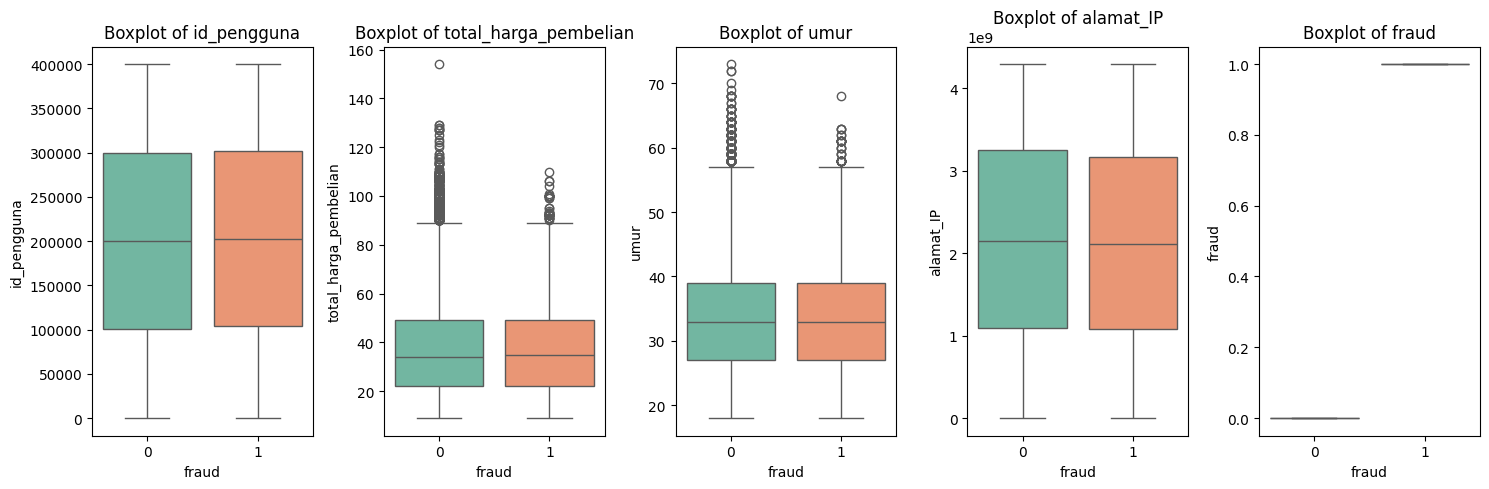

In [224]:
def boxplot_features(df, ncols=5):
    numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float64', 'timedelta64[ns]']).columns

    n = len(numeric_cols)
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*5))

    for ax, column in zip(axs.flatten(), numeric_cols):
        sns.boxplot(x='fraud', y=df[column], data=df, ax=ax, palette='Set2')
        ax.set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

boxplot_features(train, ncols=5)

Dari boxplot di atas, tidak terlihat ketidaknormalan selain <span style="color:red">***outlier***</span> pada beberapa fitur. Namun, outlier ini tidak akan diimputasi karena dalam fraud detection, observasi outlier biasanya memberikan informasi penting dalam mengklasifikasikan transaksi penipuan.

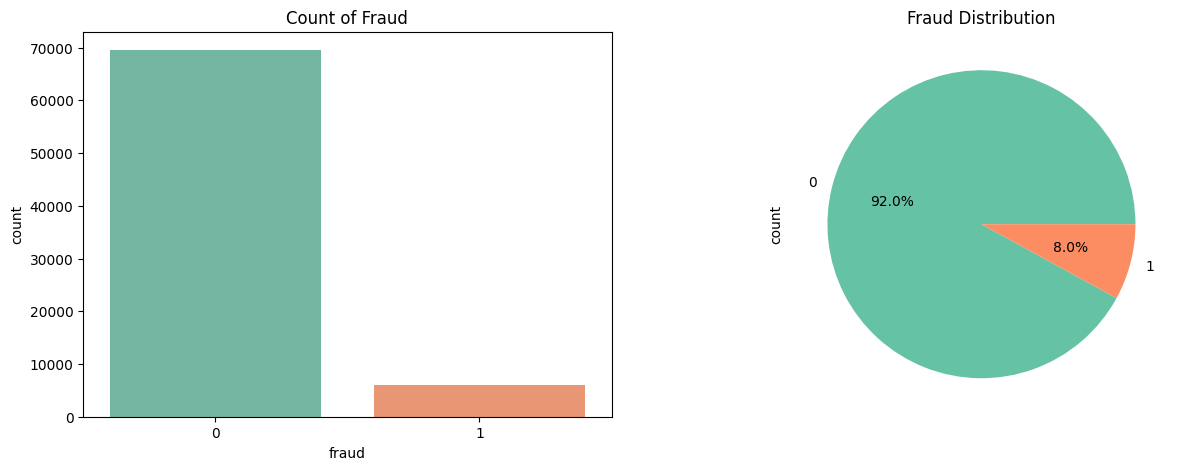

In [225]:
fig , ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='fraud', data=train, palette='Set2', ax=ax[0])
ax[0].set_title('Count of Fraud')

train['fraud'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=sns.color_palette('Set2'))
ax[1].set_title('Fraud Distribution')

plt.show()


Jumlah transaksi penipuan yang sedikit dibandingkan dengan semua transaksi menunjukkan <span style="color:red">***dataset yang tidak seimbang***</span>. Oleh karena itu, kita perlu melakukan beberapa preprocessing sebelum membuat model klasifikasi.

### **Test Data**

In [226]:
test.head()

,id_pengguna,waktu_pendaftaran_akun,waktu_pembelian,total_harga_pembelian,id_perangkat,sumber,browser,gender,umur,alamat_IP
0,28006,2015-06-26 13:27:55,2015-07-13 02:46:13,48,IVHYUSXPDUJUD,SEO,Chrome,M,31,4.268419e+09
1,245189,2015-06-23 15:48:00,2015-09-16 07:26:25,46,UJURCZHQSNBQA,SEO,Firefox,M,34,4.277726e+09
2,58345,2015-06-18 04:14:35,2015-09-21 22:24:59,30,PVWDQUCMMBJXJ,Iklan,Firefox,F,20,1.235071e+09
3,218574,2015-05-19 14:55:18,2015-08-21 00:44:36,29,PMSPHBOFWBTRC,Langsung,Safari,M,25,2.496396e+09
4,49779,2015-04-02 23:35:29,2015-07-08 06:24:47,19,NFGHLAQQPTLVY,Iklan,Chrome,M,38,2.701254e+09


In [227]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75556 entries, 0 to 75555
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_pengguna             75556 non-null  int64  
 1   waktu_pendaftaran_akun  75556 non-null  object 
 2   waktu_pembelian         75556 non-null  object 
 3   total_harga_pembelian   75556 non-null  int64  
 4   id_perangkat            75556 non-null  object 
 5   sumber                  75556 non-null  object 
 6   browser                 75556 non-null  object 
 7   gender                  75556 non-null  object 
 8   umur                    75556 non-null  int64  
 9   alamat_IP               75556 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 5.8+ MB


Tidak ada nilai yang hilang, tetapi beberapa fitur masih memiliki tipe data yang salah (misalnya: `waktu_pendaftaran_akun` dan `waktu_pembelian` seharusnya berupa objek datetime).

In [228]:
print('n of duplicated rows:', test.duplicated().sum())

n of duplicated rows: 0


Tidak ada duplikat dalam data `test`.
Sekarang kita cek distribusi dari setiap fitur numerik untuk menilai ketidaknormalan dalam dataset `test`.

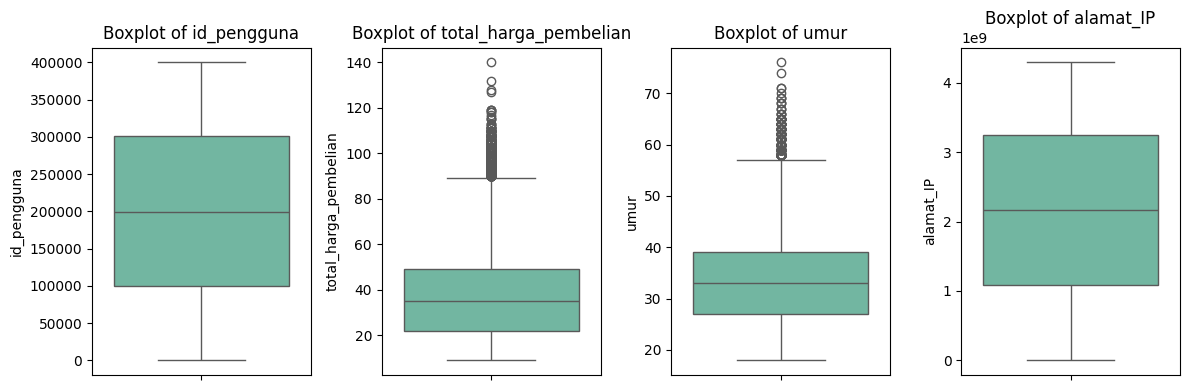

In [229]:
def boxplot_features(df, ncols=4):
    numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float64', 'timedelta64[ns]']).columns

    n = len(numeric_cols)
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*4))

    for ax, column in zip(axs.flatten(), numeric_cols):
        sns.boxplot(y=df[column], ax=ax, palette='Set2')
        ax.set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

boxplot_features(test, ncols=4)


Sama seperti dataset train, tidak ada kelainan yang terlihat kecuali <span style="color:red">***outlier***</span> pada beberapa fitur. Namun outlier-outlier ini tidak akan diimputasi karena dalam deteksi penipuan, observasi outlier biasanya memberikan informasi penting dalam mengklasifikasikan transaksi penipuan.

### **IP Address Mapping Data**

In [230]:
mapping.head()

,batas_bawah_alamat_IP,batas_atas_alamat_IP,negara
0,16777216,16777471,Australia
1,16777472,16777727,China
2,16777728,16778239,China
3,16778240,16779263,Australia
4,16779264,16781311,China


In [231]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   batas_bawah_alamat_IP  138846 non-null  int64 
 1   batas_atas_alamat_IP   138846 non-null  int64 
 2   negara                 138846 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


Tidak ada nilai yang hilang dan tipe data fitur sesuai.

In [232]:
print('n of duplicated rows:', mapping.duplicated().sum())

n of duplicated rows: 0


Tidak ada duplikat dalam data `mapping`

In [233]:
mapping.negara.value_counts()

negara
United States                            46868
Canada                                    6989
Russian Federation                        6739
Australia                                 6316
Germany                                   5999
                                         ...  
Timor-leste                                  1
Korea Democratic People's Republic of        1
St. Pierre and Miquelon                      1
Tokelau                                      1
Saint Lucia                                  1
Name: count, Length: 235, dtype: int64

## **Pre-Processing**

In [234]:
data = pd.concat((train.iloc[:,:10], test), axis=0, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id_pengguna             151112 non-null  int64  
 1   waktu_pendaftaran_akun  151112 non-null  object 
 2   waktu_pembelian         151112 non-null  object 
 3   total_harga_pembelian   151112 non-null  int64  
 4   id_perangkat            151112 non-null  object 
 5   sumber                  151112 non-null  object 
 6   browser                 151112 non-null  object 
 7   gender                  151112 non-null  object 
 8   umur                    151112 non-null  int64  
 9   alamat_IP               151112 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 11.5+ MB


Perlu dicatat bahwa penggabungan ini menciptakan sebuah dataset di mana 75556 observasi pertama berasal dari dataset `train` dan sisanya berasal dari dataset `test`. Label fraud dikecualikan karena kita tidak akan memproses label tersebut.

In [235]:
# Changes the `alamat_IP` data type to int64, `waktu_pendaftaran_akun` and `waktu_pembelian` data type to datetime64 
data['alamat_IP'] = data['alamat_IP'].astype(np.int64)
data['waktu_pendaftaran_akun'] = pd.to_datetime(data['waktu_pendaftaran_akun'], format="mixed")
data['waktu_pembelian'] = pd.to_datetime(data['waktu_pembelian'], format="mixed")

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id_pengguna             151112 non-null  int64         
 1   waktu_pendaftaran_akun  151112 non-null  datetime64[ns]
 2   waktu_pembelian         151112 non-null  datetime64[ns]
 3   total_harga_pembelian   151112 non-null  int64         
 4   id_perangkat            151112 non-null  object        
 5   sumber                  151112 non-null  object        
 6   browser                 151112 non-null  object        
 7   gender                  151112 non-null  object        
 8   umur                    151112 non-null  int64         
 9   alamat_IP               151112 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 11.5+ MB


## **Feature Engineering**

Dengan menggabungkan informasi dalam dataset `ip_address_mapping` dan dataset `train`/`test`, kita dapat mengetahui negara untuk setiap transaksi.

In [237]:
def map_ip_to_country(ip):
    country = mapping[(ip >= mapping['batas_bawah_alamat_IP']) & (ip <= mapping['batas_atas_alamat_IP'])]['negara'].values
    return country[0] if len(country) > 0 else None

data['negara'] = data['alamat_IP'].apply(map_ip_to_country)

In [238]:
data['negara'].isnull().sum()

21966

Beberapa nilai yang hilang untuk kolom negara akan tetap diisi dengan nilai 'none' karena tidak ada informasi yang tersedia untuk menggantikannya.

In [239]:
data['negara'] = data['negara'].fillna('None')

Kita juga dapat menghitung selisih waktu antara transaksi dan waktu ketika akun dibuat.

In [240]:
data['delta_daftar_beli'] = data['waktu_pembelian'] - data['waktu_pendaftaran_akun']
print(data[['delta_daftar_beli']].head())
print(data['delta_daftar_beli'].dtypes)

  delta_daftar_beli
0 112 days 03:34:00
1 117 days 22:52:00
2  75 days 12:46:00
3  19 days 21:00:00
4  42 days 13:47:00
timedelta64[ns]


kita juga dapat menambahkan fungsi `extract_cyclic_features` yang digunakan untuk mengekstrak fitur siklus waktu dari sebuah seri `timedelta`. Fungsi ini mengubah perbedaan waktu (timedelta) menjadi representasi siklus menggunakan transformasi sine dan cosine, sehingga pola waktu periodik dapat teridentifikasi dengan lebih baik.

In [241]:
def extract_cyclic_features(timedelta_series, period='year'):
    if period == 'year':
        total_seconds_in_period = 365.25 * 24 * 60 * 60 
    elif period == 'month':
        total_seconds_in_period = 30.44 * 24 * 60 * 60 
    elif period == 'day':
        total_seconds_in_period = 24 * 60 * 60
    else:
        raise ValueError("Period must be 'year', 'month', or 'day'")
    total_seconds = timedelta_series.dt.total_seconds()
    normalized_time = total_seconds / total_seconds_in_period

    sin_time = np.sin(2 * np.pi * normalized_time)
    cos_time = np.cos(2 * np.pi * normalized_time)

    return sin_time, cos_time
    
data['sin_time_delta_year'], data['cos_time_delta_year'] = extract_cyclic_features(data['delta_daftar_beli'], period='year')
data['sin_time_delta_month'], data['cos_time_delta_month'] = extract_cyclic_features(data['delta_daftar_beli'], period='month')
data['sin_time_delta_day'], data['cos_time_delta_day'] = extract_cyclic_features(data['delta_daftar_beli'], period='day')


In [242]:
data['delta_daftar_beli'] = data['delta_daftar_beli'].dt.total_seconds() # convert timedelta to seconds

Sekarang kita memisahkan tahun, bulan, hari, jam, menit, dan detik dari kolom datetime untuk menghasilkan lebih banyak fitur numerik yang mungkin membantu dalam mengklasifikasikan transaksi penipuan.

In [243]:
def split_datetime_features(df, datetime_cols):
    for col in datetime_cols:
        df[f'{col}_hour'] = df[col].dt.hour
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_month'] = df[col].dt.month

datetime_columns = ['waktu_pendaftaran_akun', 'waktu_pembelian']
split_datetime_features(data, datetime_columns)


Untuk menangkap pola periodik pada fitur waktu yang bukan bertipe `timedelta`, kita juga dapat menerapkan transformasi siklus menggunakan fungsi sinus dan kosinus. Transformasi ini membantu model memahami sifat periodik dari waktu seperti jam dan hari.

In [244]:
def extract_cyclic_features2(data, column, max_val):
    sin_col = np.sin(2 * np.pi * data[column] / max_val)
    cos_col = np.cos(2 * np.pi * data[column] / max_val)
    return sin_col, cos_col

data['sin_hour_daftar'], data['cos_hour_daftar'] = extract_cyclic_features2(data, 'waktu_pendaftaran_akun_hour', 24)
data['sin_hour_beli'], data['cos_hour_beli'] = extract_cyclic_features2(data, 'waktu_pembelian_hour', 24)
data['sin_day_daftar'], data['cos_day_daftar'] = extract_cyclic_features2(data, 'waktu_pendaftaran_akun_day', 31)
data['sin_day_beli'], data['cos_day_beli'] = extract_cyclic_features2(data, 'waktu_pembelian_day', 31)


Selanjutnya, kita juga dapat menghitung duplikasi `id_perangkat` untuk setiap `id_pengguna` karena kemungkinan bahwa satu `id_pengguna` dapat memiliki banyak `id_perangkat`.

In [245]:
perangkat_counts = data['id_perangkat'].value_counts()
data['jumlah_perangkat'] = data['id_perangkat'].map(perangkat_counts)


Selain itu, kita juga bisa menghitung total harga keseluruhan perangkat, yaitu nilai sebenarnya dari total harga pembelian perangkat tersebut dengan `user_id` tertentu.

In [246]:
data['grand_total_harga_per_perangkat'] = data['total_harga_pembelian'] * data['jumlah_perangkat']

Selanjutnya, kita akan menganalisis variabel `umur` untuk menentukan apakah lebih baik mengkategorikannya (discretize) atau membiarkannya sebagai variabel kontinu. Ini penting karena pengkategorian dapat membantu mengurangi noise dalam data.

In [247]:
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['class_umur'] = disc.fit_transform(data['umur'].values.reshape(-1, 1))

Sebelumnya, kita belum melakukan analisis tentang sebaran negara dalam data tersebut. Oleh karena itu, langkah berikutnya adalah untuk melakukan analisis tersebut terlebih dahulu.

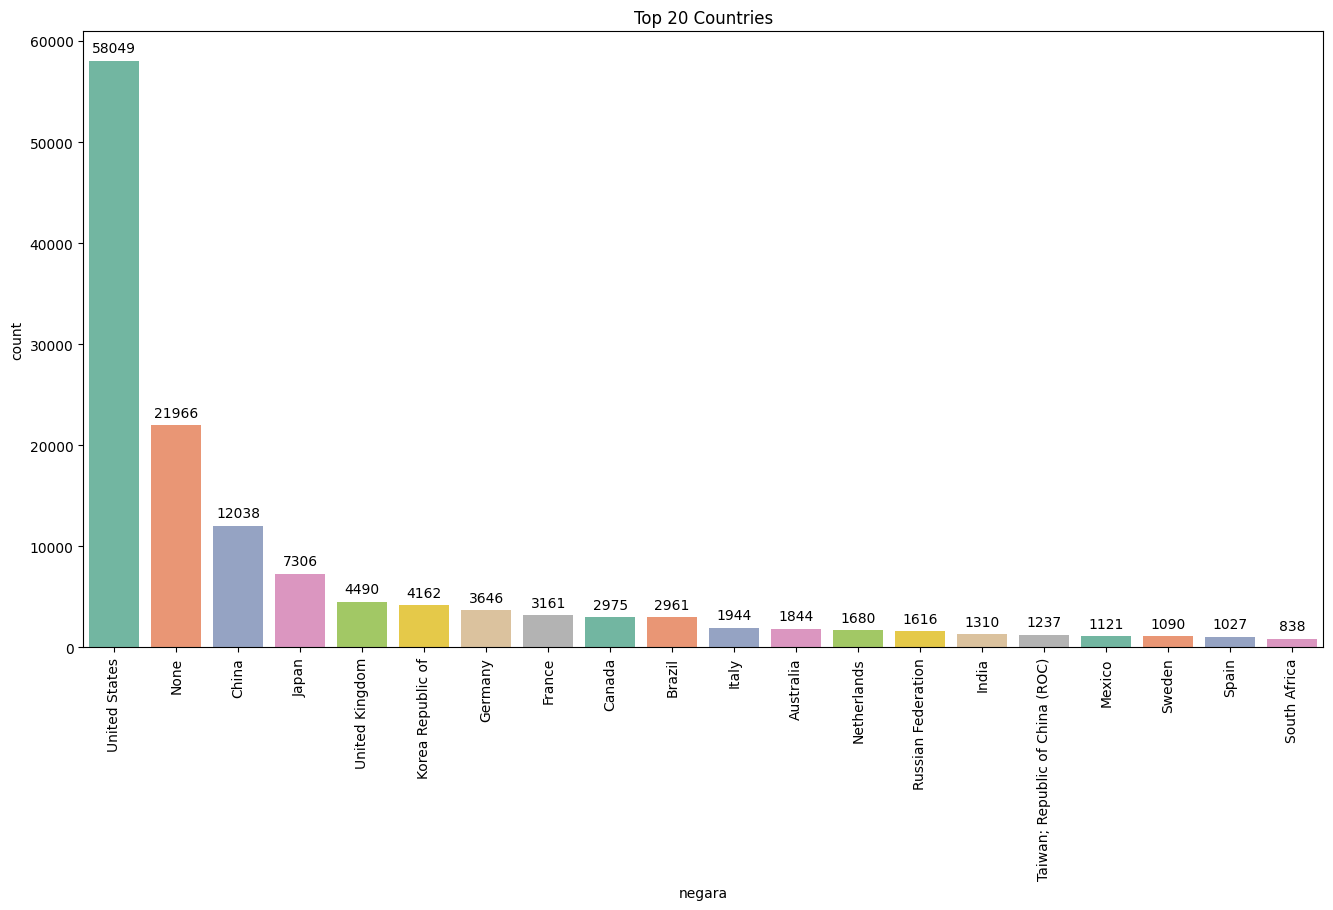

In [248]:
country_counts = data['negara'].value_counts().sort_values(ascending=False)
top_countries = country_counts.head(20)

plt.figure(figsize=(16, 8))
plot = sns.countplot(x='negara', data=data, order=top_countries.index, palette='Set2')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 9), 
                  textcoords = 'offset points')

plt.title('Top 20 Countries')
plt.xticks(rotation=90)
plt.show()


Karena distribusinya tidak seimbang, kita dapat mengelompokkannya menjadi hanya 3 kategori: `United States`, `None`, dan mengubah negara lainnya menjadi `Others`. ini dilakukan untuk mereduksi `noise` yang ada pada data.

In [249]:
data['negara'] = data['negara'].apply(lambda x: 'Others' if x not in ['None', 'United States'] else x)

## **Categorical Encoding**

In [250]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# encoder = OneHotEncoder(sparse_output=False)

# def categoricalEncoder(category, data):
#     encoder.fit(data[[category]])
#     encoded_category = pd.DataFrame(encoder.transform(data[[category]]), columns=encoder.get_feature_names_out([category]))
   
#     data = pd.concat([data.drop(category, axis=1), encoded_category], axis=1)
#     return data

# for category in ['sumber', 'browser', 'gender', 'negara', 'day_night_daftar', 'day_night_beli']:
#     data = categoricalEncoder(category, data)

In [251]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def categoricalEncoder(category, data):
    encoder = LabelEncoder()
    data[category] = encoder.fit_transform(data[category])
    return data

categories = ['sumber', 'browser', 'gender', 'negara']

for category in categories:
    data = categoricalEncoder(category, data)


In [252]:
train = pd.concat([data[data['id_pengguna'].isin(train['id_pengguna'])], train['fraud']], axis=1)
test = data[data['id_pengguna'].isin(test['id_pengguna'])]

In [253]:
train.reset_index(drop=True, inplace=True)
train.head()

,id_pengguna,waktu_pendaftaran_akun,waktu_pembelian,total_harga_pembelian,id_perangkat,sumber,browser,gender,umur,alamat_IP,...,sin_hour_beli,cos_hour_beli,sin_day_daftar,cos_day_daftar,sin_day_beli,cos_day_beli,jumlah_perangkat,grand_total_harga_per_perangkat,class_umur,fraud
0,286873,2015-06-07 12:58:00,2015-09-27 16:32:00,14,DNTIEECGGDXHF,0,3,0,38,241720722,...,-0.866025,-5.000000e-01,0.988468,0.151428,-0.724793,0.688967,1,14,3.0,0
1,244392,2015-05-01 15:29:00,2015-08-27 14:21:00,11,MECRFNJGDPGOB,2,0,1,36,4172794236,...,-0.500000,-8.660254e-01,0.201299,0.979530,-0.724793,0.688967,1,11,3.0,0
2,20720,2015-03-29 18:04:00,2015-06-13 06:50:00,52,WLTSYVLLASJOZ,2,2,1,26,1113432879,...,1.000000,6.123234e-17,-0.394356,0.918958,0.485302,-0.874347,2,104,1.0,0
3,198755,2015-01-29 00:49:00,2015-02-17 21:49:00,13,TWGNWOWURZFMY,2,4,0,38,1339308896,...,-0.707107,7.071068e-01,-0.394356,0.918958,-0.299363,-0.954139,1,13,3.0,0
4,64996,2015-01-17 19:30:00,2015-03-01 09:17:00,23,XMQENRCEILYAJ,1,4,0,19,460238214,...,0.707107,-7.071068e-01,-0.299363,-0.954139,0.201299,0.979530,1,23,0.0,0


In [254]:
test.reset_index(drop=True, inplace=True)
test.head()

,id_pengguna,waktu_pendaftaran_akun,waktu_pembelian,total_harga_pembelian,id_perangkat,sumber,browser,gender,umur,alamat_IP,...,cos_hour_daftar,sin_hour_beli,cos_hour_beli,sin_day_daftar,cos_day_daftar,sin_day_beli,cos_day_beli,jumlah_perangkat,grand_total_harga_per_perangkat,class_umur
0,28006,2015-06-26 13:27:55,2015-07-13 02:46:13,48,IVHYUSXPDUJUD,2,0,1,31,4268419106,...,-0.965926,0.500000,8.660254e-01,-0.848644,0.528964,0.485302,-0.874347,1,48,2.0
1,245189,2015-06-23 15:48:00,2015-09-16 07:26:25,46,UJURCZHQSNBQA,2,1,1,34,4277726296,...,-0.707107,0.965926,-2.588190e-01,-0.998717,-0.050649,-0.101168,-0.994869,1,46,2.0
2,58345,2015-06-18 04:14:35,2015-09-21 22:24:59,30,PVWDQUCMMBJXJ,0,1,0,20,1235071330,...,0.500000,-0.500000,8.660254e-01,-0.485302,-0.874347,-0.897805,-0.440394,1,30,0.0
3,218574,2015-05-19 14:55:18,2015-08-21 00:44:36,29,PMSPHBOFWBTRC,1,4,1,25,2496395805,...,-0.866025,0.000000,1.000000e+00,-0.651372,-0.758758,-0.897805,-0.440394,1,29,1.0
4,49779,2015-04-02 23:35:29,2015-07-08 06:24:47,19,NFGHLAQQPTLVY,0,0,1,38,2701254204,...,0.965926,1.000000,6.123234e-17,0.394356,0.918958,0.998717,-0.050649,1,19,3.0


## **Modelling**

In [255]:
train.drop(columns=['id_pengguna','waktu_pendaftaran_akun','waktu_pembelian', 'id_perangkat' , 'alamat_IP'], inplace=True)

In [256]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75556 entries, 0 to 75555
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_harga_pembelian            75556 non-null  int64  
 1   sumber                           75556 non-null  int64  
 2   browser                          75556 non-null  int64  
 3   gender                           75556 non-null  int64  
 4   umur                             75556 non-null  int64  
 5   negara                           75556 non-null  int64  
 6   delta_daftar_beli                75556 non-null  float64
 7   sin_time_delta_year              75556 non-null  float64
 8   cos_time_delta_year              75556 non-null  float64
 9   sin_time_delta_month             75556 non-null  float64
 10  cos_time_delta_month             75556 non-null  float64
 11  sin_time_delta_day               75556 non-null  float64
 12  cos_time_delta_day

In [257]:
X = train.drop(columns=['fraud'], axis=1)
y = train['fraud']

`Undersampling` akan dilakukan karena sebelumnya telah dijelaskan bahwa data fraud tidak seimbang (0 dan 1 tidak seimbang). Oleh karena itu, data akan diresample. Selain itu, kita juga dapat menambahkan `Standard Scaler` untuk menormalkan nilai-nilai tersebut.

In [258]:
from imblearn.under_sampling import RandomUnderSampler
smote = RandomUnderSampler(random_state=42)

In [259]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


Melakukan pembagian data menjadi `train` dan `test` set adalah langkah penting untuk menguji dan mengevaluasi kinerja model. Dengan membagi dataset, kita dapat melatih model menggunakan `train set` dan kemudian mengukur seberapa baik model tersebut bekerja pada data yang belum pernah dilihat sebelumnya, yaitu `test set`. Pendekatan ini membantu dalam memberikan gambaran yang lebih akurat tentang performa model dalam situasi nyata.

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train , y_train = smote.fit_resample(X_train, y_train)

In [261]:
model = CatBoostClassifier(random_state=42, verbose=0, learning_rate=0.01)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16203  1180]
 [  426  1080]]
0.8246245301254855


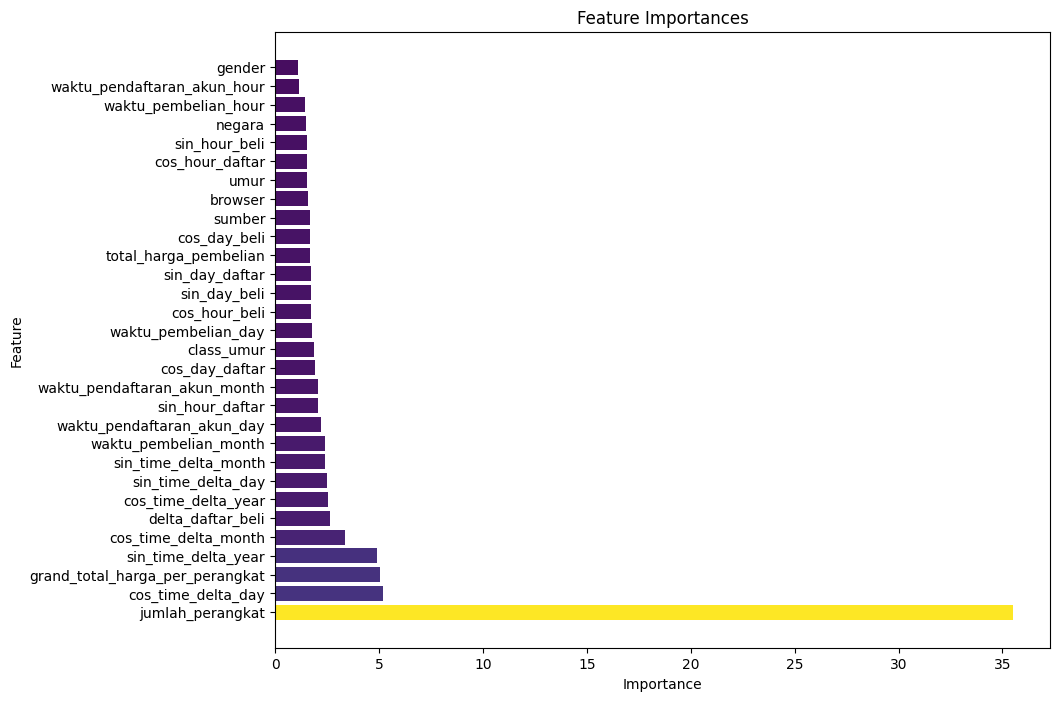

In [262]:
fig, ax = plt.subplots(figsize=(10, 8))
feature_importances = pd.DataFrame({'Feature': train.drop(columns=['fraud']).columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances = feature_importances[feature_importances['Importance'] > 0]
ax.barh(feature_importances['Feature'], feature_importances['Importance'], color=plt.cm.viridis(feature_importances['Importance']/max(feature_importances['Importance'])))
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.show()


In [263]:
bes_feat = feature_importances[feature_importances['Importance'] > 0]['Feature'].values

In [264]:
X = train[bes_feat[:10]]
y = train['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train , y_train = smote.fit_resample(X_train, y_train)

## **Hyperparameter Tuning (Optional)**

In [265]:
import optuna

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 2800),
        'depth': trial.suggest_int('depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 1e-1),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_int('random_strength', 0, 250),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 150),
        'random_state': 42,
        'verbose': 0
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f"Balanced Accuracy Score: {balanced_acc}")

    return balanced_acc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
print(f"Best parameters: {study.best_params}")
print(f"Best balanced accuracy score: {study.best_value}")


[I 2024-07-24 02:09:54,351] A new study created in memory with name: no-name-711bb7a3-04fc-4205-87d8-5ab682d0d413
[I 2024-07-24 02:09:55,327] Trial 0 finished with value: 0.824522634690867 and parameters: {'iterations': 469, 'depth': 2, 'learning_rate': 0.08942408103891743, 'l2_leaf_reg': 3.1900766015582884e-05, 'border_count': 42, 'random_strength': 83, 'bagging_temperature': 0.3718465315647358}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.72      0.57      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889

[[16211  1172]
 [  427  1079]]
Balanced Accuracy Score: 0.824522634690867


[I 2024-07-24 02:09:56,887] Trial 1 finished with value: 0.8100627461963685 and parameters: {'iterations': 589, 'depth': 4, 'learning_rate': 0.0893053506066449, 'l2_leaf_reg': 3.7962598489374386e-05, 'border_count': 229, 'random_strength': 44, 'bagging_temperature': 2.577959195993151}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.91      0.94     17383
           1       0.40      0.71      0.51      1506

    accuracy                           0.89     18889
   macro avg       0.69      0.81      0.73     18889
weighted avg       0.93      0.89      0.90     18889

[[15766  1617]
 [  432  1074]]
Balanced Accuracy Score: 0.8100627461963685


[I 2024-07-24 02:10:01,716] Trial 2 finished with value: 0.7918650237493715 and parameters: {'iterations': 1964, 'depth': 5, 'learning_rate': 0.003961866572209462, 'l2_leaf_reg': 0.00088547003093494, 'border_count': 96, 'random_strength': 173, 'bagging_temperature': 3.2714592105246876}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.62      0.62      0.62      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.79      0.79     18889
weighted avg       0.94      0.94      0.94     18889

[[16807   576]
 [  577   929]]
Balanced Accuracy Score: 0.7918650237493715


[I 2024-07-24 02:10:05,721] Trial 3 finished with value: 0.8236753268809363 and parameters: {'iterations': 2013, 'depth': 2, 'learning_rate': 0.020265928856016774, 'l2_leaf_reg': 3.732789346678185e-05, 'border_count': 141, 'random_strength': 109, 'bagging_temperature': 0.05035992987199177}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16170  1213]
 [  426  1080]]
Balanced Accuracy Score: 0.8236753268809363


[I 2024-07-24 02:10:12,977] Trial 4 finished with value: 0.822394118324302 and parameters: {'iterations': 2648, 'depth': 6, 'learning_rate': 0.008255755312255742, 'l2_leaf_reg': 0.0004666672713740711, 'border_count': 102, 'random_strength': 195, 'bagging_temperature': 1.870392294469093}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.46      0.72      0.56      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16137  1246]
 [  427  1079]]
Balanced Accuracy Score: 0.822394118324302


[I 2024-07-24 02:10:16,369] Trial 5 finished with value: 0.7823455263301241 and parameters: {'iterations': 931, 'depth': 7, 'learning_rate': 0.00011819382077096049, 'l2_leaf_reg': 0.021113910110761937, 'border_count': 193, 'random_strength': 15, 'bagging_temperature': 0.18815083472336927}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17383
           1       0.70      0.59      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.83      0.78      0.81     18889
weighted avg       0.94      0.95      0.94     18889

[[17007   376]
 [  623   883]]
Balanced Accuracy Score: 0.7823455263301241


[I 2024-07-24 02:10:22,047] Trial 6 finished with value: 0.7985222430762482 and parameters: {'iterations': 1428, 'depth': 7, 'learning_rate': 0.00754384829152276, 'l2_leaf_reg': 0.01240868644642662, 'border_count': 240, 'random_strength': 247, 'bagging_temperature': 11.835152401094312}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.57      0.64      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.80      0.78     18889
weighted avg       0.94      0.93      0.93     18889

[[16646   737]
 [  543   963]]
Balanced Accuracy Score: 0.7985222430762482


[I 2024-07-24 02:10:25,684] Trial 7 finished with value: 0.7855560442461873 and parameters: {'iterations': 1275, 'depth': 5, 'learning_rate': 0.0924199502980563, 'l2_leaf_reg': 6.438001351303961e-05, 'border_count': 183, 'random_strength': 106, 'bagging_temperature': 0.13883601035178286}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.86      0.91     17383
           1       0.30      0.71      0.43      1506

    accuracy                           0.85     18889
   macro avg       0.64      0.79      0.67     18889
weighted avg       0.92      0.85      0.87     18889

[[14914  2469]
 [  432  1074]]
Balanced Accuracy Score: 0.7855560442461873


[I 2024-07-24 02:10:31,820] Trial 8 finished with value: 0.7890447261940751 and parameters: {'iterations': 2240, 'depth': 4, 'learning_rate': 0.08722740593405794, 'l2_leaf_reg': 0.0017773363765891908, 'border_count': 40, 'random_strength': 193, 'bagging_temperature': 0.3846642977329856}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.87      0.92     17383
           1       0.32      0.71      0.44      1506

    accuracy                           0.86     18889
   macro avg       0.65      0.79      0.68     18889
weighted avg       0.92      0.86      0.88     18889

[[15093  2290]
 [  437  1069]]
Balanced Accuracy Score: 0.7890447261940751


[I 2024-07-24 02:10:35,490] Trial 9 finished with value: 0.7699013338962315 and parameters: {'iterations': 1302, 'depth': 4, 'learning_rate': 0.0023949181445924823, 'l2_leaf_reg': 0.00010272508626281273, 'border_count': 203, 'random_strength': 174, 'bagging_temperature': 0.31772697459886173}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.55      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889

[[17290    93]
 [  685   821]]
Balanced Accuracy Score: 0.7699013338962315


[I 2024-07-24 02:10:36,572] Trial 10 finished with value: 0.7708037244490751 and parameters: {'iterations': 188, 'depth': 10, 'learning_rate': 0.0005441039822832978, 'l2_leaf_reg': 1.744166828712572e-05, 'border_count': 36, 'random_strength': 60, 'bagging_temperature': 74.28486053414588}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.97      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889

[[17356    27]
 [  688   818]]
Balanced Accuracy Score: 0.7708037244490751


[I 2024-07-24 02:10:39,913] Trial 11 finished with value: 0.8238479092890361 and parameters: {'iterations': 1812, 'depth': 1, 'learning_rate': 0.02269475978735425, 'l2_leaf_reg': 1.0044841797973224e-05, 'border_count': 143, 'random_strength': 107, 'bagging_temperature': 0.020864363048996044}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16176  1207]
 [  426  1080]]
Balanced Accuracy Score: 0.8238479092890361


[I 2024-07-24 02:10:40,133] Trial 12 finished with value: 0.7679382758520845 and parameters: {'iterations': 168, 'depth': 1, 'learning_rate': 0.022305492930525063, 'l2_leaf_reg': 1.107293877820558e-05, 'border_count': 83, 'random_strength': 78, 'bagging_temperature': 0.01269964387039463}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17383
           1       0.53      0.58      0.55      1506

    accuracy                           0.93     18889
   macro avg       0.75      0.77      0.76     18889
weighted avg       0.93      0.93      0.93     18889

[[16610   773]
 [  632   874]]
Balanced Accuracy Score: 0.7679382758520845


[I 2024-07-24 02:10:41,827] Trial 13 finished with value: 0.8242374420704878 and parameters: {'iterations': 797, 'depth': 1, 'learning_rate': 0.02622964707451538, 'l2_leaf_reg': 0.00020596945202624726, 'border_count': 136, 'random_strength': 130, 'bagging_temperature': 0.010630806772649286}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16178  1205]
 [  425  1081]]
Balanced Accuracy Score: 0.8242374420704878


[I 2024-07-24 02:10:43,333] Trial 14 finished with value: 0.8238898325278341 and parameters: {'iterations': 692, 'depth': 2, 'learning_rate': 0.040069113563363, 'l2_leaf_reg': 0.00020987853689333517, 'border_count': 72, 'random_strength': 150, 'bagging_temperature': 0.04007252914682079}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16189  1194]
 [  427  1079]]
Balanced Accuracy Score: 0.8238898325278341


[I 2024-07-24 02:10:45,320] Trial 15 finished with value: 0.7685689961777465 and parameters: {'iterations': 898, 'depth': 2, 'learning_rate': 0.001671042696670774, 'l2_leaf_reg': 0.0030503526465405807, 'border_count': 117, 'random_strength': 137, 'bagging_temperature': 16.571967823856426}. Best is trial 0 with value: 0.824522634690867.


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17383
           1       0.72      0.56      0.63      1506

    accuracy                           0.95     18889
   macro avg       0.84      0.77      0.80     18889
weighted avg       0.94      0.95      0.94     18889

[[17059   324]
 [  669   837]]
Balanced Accuracy Score: 0.7685689961777465


[I 2024-07-24 02:10:46,546] Trial 16 finished with value: 0.8245670026561189 and parameters: {'iterations': 468, 'depth': 3, 'learning_rate': 0.038296379167744865, 'l2_leaf_reg': 0.08140697872021789, 'border_count': 167, 'random_strength': 1, 'bagging_temperature': 0.6106610863431011}. Best is trial 16 with value: 0.8245670026561189.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16201  1182]
 [  426  1080]]
Balanced Accuracy Score: 0.8245670026561189


[I 2024-07-24 02:10:47,679] Trial 17 finished with value: 0.8246952170989669 and parameters: {'iterations': 440, 'depth': 3, 'learning_rate': 0.040867084028138795, 'l2_leaf_reg': 0.06219723279655087, 'border_count': 164, 'random_strength': 2, 'bagging_temperature': 0.7351217529635621}. Best is trial 17 with value: 0.8246952170989669.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.72      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889

[[16217  1166]
 [  427  1079]]
Balanced Accuracy Score: 0.8246952170989669


[I 2024-07-24 02:10:48,859] Trial 18 finished with value: 0.8241355466358693 and parameters: {'iterations': 384, 'depth': 3, 'learning_rate': 0.008992694686391479, 'l2_leaf_reg': 0.0704582172826594, 'border_count': 170, 'random_strength': 4, 'bagging_temperature': 0.7908495911447121}. Best is trial 17 with value: 0.8246952170989669.


              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

[[16186  1197]
 [  426  1080]]
Balanced Accuracy Score: 0.8241355466358693


[I 2024-07-24 02:10:55,854] Trial 19 finished with value: 0.7967665665933172 and parameters: {'iterations': 1091, 'depth': 9, 'learning_rate': 0.04696935892166542, 'l2_leaf_reg': 0.09065399727629674, 'border_count': 163, 'random_strength': 29, 'bagging_temperature': 8.980589436659972}. Best is trial 17 with value: 0.8246952170989669.


              precision    recall  f1-score   support

           0       0.97      0.88      0.93     17383
           1       0.35      0.71      0.47      1506

    accuracy                           0.87     18889
   macro avg       0.66      0.80      0.70     18889
weighted avg       0.92      0.87      0.89     18889

[[15373  2010]
 [  438  1068]]
Balanced Accuracy Score: 0.7967665665933172
Best parameters: {'iterations': 440, 'depth': 3, 'learning_rate': 0.040867084028138795, 'l2_leaf_reg': 0.06219723279655087, 'border_count': 164, 'random_strength': 2, 'bagging_temperature': 0.7351217529635621}
Best balanced accuracy score: 0.8246952170989669


## **Menggunakan Neural Network**

In [266]:
X = train.drop(columns=['fraud'], axis=1)
y = train['fraud']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train , y_train = smote.fit_resample(X_train, y_train)

In [267]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=5)])


Epoch 1/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6062 - loss: 0.6266 - val_accuracy: 0.9581 - val_loss: 0.4862
Epoch 2/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6438 - loss: 0.5693 - val_accuracy: 0.9587 - val_loss: 0.4856
Epoch 3/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6403 - loss: 0.5753 - val_accuracy: 0.9565 - val_loss: 0.4334
Epoch 4/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6513 - loss: 0.5768 - val_accuracy: 0.9579 - val_loss: 0.4523
Epoch 5/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6523 - loss: 0.5632 - val_accuracy: 0.9235 - val_loss: 0.4783
Epoch 6/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6644 - loss: 0.5660 - val_accuracy: 0.9610 - val_loss: 0.4261
Epoch 7/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6662 - loss: 0.5590 - val_accuracy: 0.9291 - val_loss: 0.4761
Epoch 8/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6724 - loss: 0.5550 - val_accuracy: 0.

In [268]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Calculate balanced accuracy score
print(balanced_accuracy_score(y_test, y_pred))

591/591 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step
0.8116879736036773


## **Find Better Model**

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, ClusterCentroids
from tqdm import tqdm  


scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
categorical_features = [0, 1] 
e
resamplers = [
    SMOTE(random_state=42),
    SMOTETomek(random_state=42),
    SMOTENC(categorical_features=categorical_features, random_state=42),
    ADASYN(random_state=42),
    SMOTEENN(random_state=42),
    RandomUnderSampler(random_state=42),
    NearMiss(),
    TomekLinks(),
    ClusterCentroids(random_state=42)
]

classifiers = [
    ("RandomForest", RandomForestClassifier(random_state=42)),
    ("LogisticRegression", LogisticRegression(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ("CatBoost", CatBoostClassifier(random_state=42, verbose=0)),
    ("KNeighbors", KNeighborsClassifier()),
    ("DecisionTree", DecisionTreeClassifier(random_state=42)),
    ("GaussianNB", GaussianNB()),
    ("GradientBoosting", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Bagging", BaggingClassifier(random_state=42))
]

X = train.drop(columns=['fraud'], axis=1)
y = train['fraud']

results = []

for scaler in tqdm(scalers, desc='Scalers'):
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

    for resampler in tqdm(resamplers, desc='Resamplers', leave=False):
        try:
            X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)

            for name, classifier in tqdm(classifiers, desc='Classifiers', leave=False):
                classifier.fit(X_resampled, y_resampled)

                y_pred = classifier.predict(X_test)
                balanced_acc = balanced_accuracy_score(y_test, y_pred)
                class_report = classification_report(y_test, y_pred)

                result = {
                    "Scaler": scaler.__class__.__name__,
                    "Resampler": resampler.__class__.__name__,
                    "Classifier": name,
                    "Balanced Accuracy": balanced_acc,
                    "Classification Report": class_report
                }
                results.append(result)

                print(f"Scaler: {scaler.__class__.__name__}")
                print(f"Resampler: {resampler.__class__.__name__}")
                print(f"Classifier: {name}")
                print(f"Balanced Accuracy: {balanced_acc}")
                print(f"Classification Report:\n{class_report}")
                print("="*80)
        except Exception as e:
            print(f"Error with resampler {resampler.__class__.__name__}: {e}")

results_df = pd.DataFrame(results)


Scalers:   0%|          | 0/3 [00:00<?, ?it/s]



Scaler: StandardScaler
Resampler: SMOTE
Classifier: RandomForest
Balanced Accuracy: 0.7739799588965085
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: LogisticRegression
Balanced Accuracy: 0.8149036865634549
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     17383
           1       0.51      0.69      0.59      1506

    accuracy                           0.92     18889
   macro avg       0.74      0.81      0.77     18889
weighted avg       0.94      0.92      0.93     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: XGBoost
Balanced Accuracy: 0.7727226246216499
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: CatBoost
Balanced Accuracy: 0.7718128998894449
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: KNeighbors
Balanced Accuracy: 0.724530629710348
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     17383
           1       0.23      0.63      0.34      1506

    accuracy                           0.81     18889
   macro avg       0.60      0.72      0.61     18889
weighted avg       0.90      0.81      0.84     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: DecisionTree
Balanced Accuracy: 0.7726297823146808
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.50      0.60      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: StandardScaler
Resampler: SMOTE
Classifier: GaussianNB
Balanced Accuracy: 0.7626938601229896
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: GradientBoosting
Balanced Accuracy: 0.7728425690132907
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.93      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: AdaBoost
Balanced Accuracy: 0.7919834592864042
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.66      0.61      0.64      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTE
Classifier: Bagging
Balanced Accuracy: 0.7754566882711726
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: RandomForest
Balanced Accuracy: 0.7733447120070218
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: LogisticRegression
Balanced Accuracy: 0.8149899777675048
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     17383
           1       0.51      0.69      0.59      1506

    accuracy                           0.92     18889
   macro avg       0.74      0.81      0.77     18889
weighted avg       0.94      0.92      0.93     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: XGBoost
Balanced Accuracy: 0.7718728720852653
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: CatBoost
Balanced Accuracy: 0.7715384220467265
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: KNeighbors
Balanced Accuracy: 0.724530629710348
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     17383
           1       0.23      0.63      0.34      1506

    accuracy                           0.81     18889
   macro avg       0.60      0.72      0.61     18889
weighted avg       0.90      0.81      0.84     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: DecisionTree
Balanced Accuracy: 0.7748699730216796
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.49      0.60      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: GaussianNB
Balanced Accuracy: 0.7626938601229896
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: GradientBoosting
Balanced Accuracy: 0.7732033380600591
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.93      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: AdaBoost
Balanced Accuracy: 0.7919834592864042
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.66      0.61      0.64      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTETomek
Classifier: Bagging
Balanced Accuracy: 0.7774487201436826
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.56      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: RandomForest
Balanced Accuracy: 0.7714808945773599
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: LogisticRegression
Balanced Accuracy: 0.8098143772682
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17383
           1       0.53      0.67      0.59      1506

    accuracy                           0.93     18889
   macro avg       0.75      0.81      0.77     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: XGBoost
Balanced Accuracy: 0.7720586139974799
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: CatBoost
Balanced Accuracy: 0.7718128998894449
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: KNeighbors
Balanced Accuracy: 0.7157084332137786
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     17383
           1       0.22      0.62      0.33      1506

    accuracy                           0.79     18889
   macro avg       0.59      0.72      0.60     18889
weighted avg       0.90      0.79      0.83     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: DecisionTree
Balanced Accuracy: 0.770668958903308
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.49      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: StandardScaler
Resampler: SMOTENC
Classifier: GaussianNB
Balanced Accuracy: 0.7625788051842564
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: GradientBoosting
Balanced Accuracy: 0.7761592415358414
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.84      0.56      0.67      1506

    accuracy                           0.96     18889
   macro avg       0.90      0.78      0.82     18889
weighted avg       0.95      0.96      0.95     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: AdaBoost
Balanced Accuracy: 0.8026847145541212
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     17383
           1       0.60      0.64      0.62      1506

    accuracy                           0.94     18889
   macro avg       0.78      0.80      0.79     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTENC
Classifier: Bagging
Balanced Accuracy: 0.7740267715882142
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.93      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: RandomForest
Balanced Accuracy: 0.7747614691858655
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.94      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: LogisticRegression
Balanced Accuracy: 0.822726123636387
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.46      0.72      0.56      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: XGBoost
Balanced Accuracy: 0.7738073764884086
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: CatBoost
Balanced Accuracy: 0.7722599601402631
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: KNeighbors
Balanced Accuracy: 0.7088983993841123
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     17383
           1       0.20      0.65      0.30      1506

    accuracy                           0.76     18889
   macro avg       0.58      0.71      0.58     18889
weighted avg       0.90      0.76      0.81     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: DecisionTree
Balanced Accuracy: 0.7676258283516302
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17383
           1       0.48      0.59      0.53      1506

    accuracy                           0.92     18889
   macro avg       0.72      0.77      0.74     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: StandardScaler
Resampler: ADASYN
Classifier: GaussianNB
Balanced Accuracy: 0.7734422909714953
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17383
           1       0.76      0.56      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.86      0.77      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: GradientBoosting
Balanced Accuracy: 0.793494777720505
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.68      0.61      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.82      0.79      0.81     18889
weighted avg       0.94      0.95      0.95     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: AdaBoost
Balanced Accuracy: 0.8157690433304081
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     17383
           1       0.51      0.69      0.59      1506

    accuracy                           0.92     18889
   macro avg       0.74      0.82      0.77     18889
weighted avg       0.94      0.92      0.93     18889



Scaler: StandardScaler
Resampler: ADASYN
Classifier: Bagging
Balanced Accuracy: 0.7757024023792077
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: RandomForest
Balanced Accuracy: 0.7764132256950835
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.89      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.92      0.78      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: LogisticRegression
Balanced Accuracy: 0.8239629642277694
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: XGBoost
Balanced Accuracy: 0.7760500119218614
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.91      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: CatBoost
Balanced Accuracy: 0.7727406735786724
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.94      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: KNeighbors
Balanced Accuracy: 0.7001985920056375
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     17383
           1       0.18      0.65      0.29      1506

    accuracy                           0.74     18889
   macro avg       0.57      0.70      0.56     18889
weighted avg       0.90      0.74      0.80     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: DecisionTree
Balanced Accuracy: 0.7657026117089104
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     17383
           1       0.43      0.60      0.50      1506

    accuracy                           0.90     18889
   macro avg       0.70      0.77      0.72     18889
weighted avg       0.92      0.90      0.91     18889

Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: GaussianNB
Balanced Accuracy: 0.7631146013655783
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: GradientBoosting
Balanced Accuracy: 0.7943387049321363
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.65      0.62      0.64      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: AdaBoost
Balanced Accuracy: 0.8009744947036912
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.57      0.64      0.61      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.80      0.79     18889
weighted avg       0.94      0.93      0.94     18889



Scaler: StandardScaler
Resampler: SMOTEENN
Classifier: Bagging
Balanced Accuracy: 0.7788728115018879
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.84      0.57      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.90      0.78      0.83     18889
weighted avg       0.95      0.96      0.95     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: RandomForest
Balanced Accuracy: 0.8228026359346217
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.71      0.57      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: LogisticRegression
Balanced Accuracy: 0.787691264511075
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.68      0.60      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.82      0.79      0.80     18889
weighted avg       0.94      0.95      0.94     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: XGBoost
Balanced Accuracy: 0.7988556044475381
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     17383
           1       0.35      0.71      0.47      1506

    accuracy                           0.87     18889
   macro avg       0.66      0.80      0.70     18889
weighted avg       0.92      0.87      0.89     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: CatBoost
Balanced Accuracy: 0.8216150527613988
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.46      0.72      0.56      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: KNeighbors
Balanced Accuracy: 0.7196943687024897
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     17383
           1       0.23      0.62      0.34      1506

    accuracy                           0.81     18889
   macro avg       0.60      0.72      0.61     18889
weighted avg       0.90      0.81      0.84     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: DecisionTree
Balanced Accuracy: 0.727151204574022
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     17383
           1       0.18      0.74      0.29      1506

    accuracy                           0.71     18889
   macro avg       0.58      0.73      0.56     18889
weighted avg       0.91      0.71      0.78     18889

Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: GaussianNB
Balanced Accuracy: 0.7613707283275573
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.62      0.55      0.58      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.76      0.78     18889
weighted avg       0.93      0.94      0.94     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: GradientBoosting
Balanced Accuracy: 0.8235841462239787
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.71      0.57      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: AdaBoost
Balanced Accuracy: 0.8249804097193462
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.49      0.72      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.77     18889
weighted avg       0.94      0.92      0.92     18889



Scaler: StandardScaler
Resampler: RandomUnderSampler
Classifier: Bagging
Balanced Accuracy: 0.7978492366227052
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     17383
           1       0.39      0.69      0.50      1506

    accuracy                           0.89     18889
   macro avg       0.68      0.80      0.72     18889
weighted avg       0.92      0.89      0.90     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: RandomForest
Balanced Accuracy: 0.7455709196426819
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     17383
           1       0.19      0.78      0.30      1506

    accuracy                           0.72     18889
   macro avg       0.58      0.75      0.56     18889
weighted avg       0.91      0.72      0.78     18889

Scaler: StandardScaler
Resampler: NearMiss
Classifier: LogisticRegression
Balanced Accuracy: 0.7592317645752873
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     17383
           1       0.25      0.69      0.37      1506

    accuracy                           0.81     18889
   macro avg       0.61      0.76      0.63     18889
weighted avg       0.91      0.81      0.85     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: XGBoost
Balanced Accuracy: 0.7120987755052772
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     17383
           1       0.16      0.79      0.26      1506

    accuracy                           0.64     18889
   macro avg       0.56      0.71      0.51     18889
weighted avg       0.91      0.64      0.72     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: CatBoost
Balanced Accuracy: 0.728342015550141
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     17383
           1       0.17      0.80      0.28      1506

    accuracy                           0.67     18889
   macro avg       0.57      0.73      0.53     18889
weighted avg       0.91      0.67      0.75     18889

Scaler: StandardScaler
Resampler: NearMiss
Classifier: KNeighbors
Balanced Accuracy: 0.7349165725637976
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     17383
           1       0.30      0.59      0.40      1506

    accuracy                           0.86     18889
   macro avg       0.63      0.73      0.66     18889
weighted avg       0.91      0.86      0.88     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: DecisionTree
Balanced Accuracy: 0.6853084507546909
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73     17383
           1       0.14      0.78      0.24      1506

    accuracy                           0.61     18889
   macro avg       0.56      0.69      0.49     18889
weighted avg       0.90      0.61      0.69     18889

Scaler: StandardScaler
Resampler: NearMiss
Classifier: GaussianNB
Balanced Accuracy: 0.7575398992726863
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17383
           1       0.46      0.57      0.51      1506

    accuracy                           0.91     18889
   macro avg       0.71      0.76      0.73     18889
weighted avg       0.92      0.91      0.92     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: GradientBoosting
Balanced Accuracy: 0.7424864388349686
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     17383
           1       0.18      0.79      0.30      1506

    accuracy                           0.70     18889
   macro avg       0.58      0.74      0.55     18889
weighted avg       0.91      0.70      0.77     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: AdaBoost
Balanced Accuracy: 0.7195617422923696
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     17383
           1       0.16      0.79      0.27      1506

    accuracy                           0.66     18889
   macro avg       0.57      0.72      0.52     18889
weighted avg       0.91      0.66      0.74     18889



Scaler: StandardScaler
Resampler: NearMiss
Classifier: Bagging
Balanced Accuracy: 0.7402022430518009
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     17383
           1       0.19      0.76      0.30      1506

    accuracy                           0.72     18889
   macro avg       0.58      0.74      0.56     18889
weighted avg       0.91      0.72      0.78     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: RandomForest
Balanced Accuracy: 0.7708875709266713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: LogisticRegression
Balanced Accuracy: 0.7685996316561211
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.54      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: XGBoost
Balanced Accuracy: 0.7726675418787371
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: CatBoost
Balanced Accuracy: 0.7712064167346415
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: KNeighbors
Balanced Accuracy: 0.7705448508369254
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.54      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: DecisionTree
Balanced Accuracy: 0.7692760760062398
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.51      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: StandardScaler
Resampler: TomekLinks
Classifier: GaussianNB
Balanced Accuracy: 0.7670824878972671
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.81      0.55      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.89      0.77      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: GradientBoosting
Balanced Accuracy: 0.7709163346613546
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: AdaBoost
Balanced Accuracy: 0.7708875709266713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: TomekLinks
Classifier: Bagging
Balanced Accuracy: 0.7722624048667169
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: RandomForest
Balanced Accuracy: 0.5033604675050398
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.01      0.02     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.53      0.50      0.08     18889
weighted avg       0.90      0.09      0.03     18889

Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: LogisticRegression
Balanced Accuracy: 0.7717700407788012
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.84      0.55      0.67      1506

    accuracy                           0.96     18889
   macro avg       0.90      0.77      0.82     18889
weighted avg       0.95      0.96      0.95     18889



Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: XGBoost
Balanced Accuracy: 0.5004889834896163
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.54      0.50      0.07     18889
weighted avg       0.93      0.08      0.01     18889



Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: CatBoost
Balanced Accuracy: 0.500373928550883
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.54      0.50      0.07     18889
weighted avg       0.93      0.08      0.01     18889

Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: KNeighbors
Balanced Accuracy: 0.7635392961892291
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17383
           1       0.56      0.57      0.56      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.76      0.76     18889
weighted avg       0.93      0.93      0.93     18889



Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: DecisionTree
Balanced Accuracy: 0.5183711834286662
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.05      0.09     17383
           1       0.08      0.99      0.15      1506

    accuracy                           0.12     18889
   macro avg       0.53      0.52      0.12     18889
weighted avg       0.91      0.12      0.10     18889

Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: GaussianNB
Balanced Accuracy: 0.7515799808684875
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94     17383
           1       0.40      0.58      0.47      1506

    accuracy                           0.90     18889
   macro avg       0.68      0.75      0.71     18889
weighted avg       0.92      0.90      0.91     18889



Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: GradientBoosting
Balanced Accuracy: 0.5008892310487288
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.00      0.01     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.52      0.50      0.08     18889
weighted avg       0.89      0.08      0.02     18889



Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: AdaBoost
Balanced Accuracy: 0.5071728847138054
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.02      0.03     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.54      0.51      0.09     18889
weighted avg       0.92      0.09      0.04     18889





Scalers:  33%|███▎      | 1/3 [16:27<32:55, 987.56s/it]

Scaler: StandardScaler
Resampler: ClusterCentroids
Classifier: Bagging
Balanced Accuracy: 0.5080859900443099
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.02      0.04     17383
           1       0.08      0.99      0.15      1506

    accuracy                           0.10     18889
   macro avg       0.53      0.51      0.10     18889
weighted avg       0.91      0.10      0.05     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: RandomForest
Balanced Accuracy: 0.7730702341643034
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.97      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: LogisticRegression
Balanced Accuracy: 0.805528007817624
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.56      0.66      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.81      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: XGBoost
Balanced Accuracy: 0.7716139984731155
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: CatBoost
Balanced Accuracy: 0.7716534769854597
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: KNeighbors
Balanced Accuracy: 0.7228525541929007
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     17383
           1       0.24      0.62      0.34      1506

    accuracy                           0.81     18889
   macro avg       0.60      0.72      0.61     18889
weighted avg       0.90      0.81      0.84     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: DecisionTree
Balanced Accuracy: 0.7715606346784907
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.50      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: GaussianNB
Balanced Accuracy: 0.7626650963883063
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: GradientBoosting
Balanced Accuracy: 0.7745362487613068
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.89      0.56      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: AdaBoost
Balanced Accuracy: 0.7992447170416304
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.61      0.63      0.62      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.80      0.79     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTE
Classifier: Bagging
Balanced Accuracy: 0.77540160552826
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: RandomForest
Balanced Accuracy: 0.7731852891030367
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.97      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: LogisticRegression
Balanced Accuracy: 0.8044013327120672
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.56      0.65      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.80      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: XGBoost
Balanced Accuracy: 0.7733734757417052
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: CatBoost
Balanced Accuracy: 0.7714521308426765
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: KNeighbors
Balanced Accuracy: 0.7229100816622673
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     17383
           1       0.24      0.62      0.34      1506

    accuracy                           0.81     18889
   macro avg       0.60      0.72      0.61     18889
weighted avg       0.90      0.81      0.84     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: DecisionTree
Balanced Accuracy: 0.7674171480294856
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.50      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: GaussianNB
Balanced Accuracy: 0.7626938601229896
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: GradientBoosting
Balanced Accuracy: 0.7757516597973673
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.86      0.56      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.91      0.78      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: AdaBoost
Balanced Accuracy: 0.7992447170416304
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.61      0.63      0.62      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.80      0.79     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTETomek
Classifier: Bagging
Balanced Accuracy: 0.7742174029533364
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.77      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: RandomForest
Balanced Accuracy: 0.7712927079386914
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: LogisticRegression
Balanced Accuracy: 0.8025063068212681
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.57      0.65      0.61      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.80      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: XGBoost
Balanced Accuracy: 0.7717134491812803
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: CatBoost
Balanced Accuracy: 0.7715959495160931
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: KNeighbors
Balanced Accuracy: 0.7162023061563025
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     17383
           1       0.22      0.62      0.32      1506

    accuracy                           0.79     18889
   macro avg       0.59      0.72      0.60     18889
weighted avg       0.90      0.79      0.83     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: DecisionTree
Balanced Accuracy: 0.7708522560890687
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.50      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: GaussianNB
Balanced Accuracy: 0.7625212777148898
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.64      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: GradientBoosting
Balanced Accuracy: 0.7745016597018701
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.82      0.56      0.66      1506

    accuracy                           0.96     18889
   macro avg       0.89      0.77      0.82     18889
weighted avg       0.95      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: AdaBoost
Balanced Accuracy: 0.7956452966251544
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.63      0.62      0.62      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.80      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTENC
Classifier: Bagging
Balanced Accuracy: 0.7765365506850238
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.56      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: RandomForest
Balanced Accuracy: 0.7773599842131789
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.94      0.56      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: LogisticRegression
Balanced Accuracy: 0.8230712884525867
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: XGBoost
Balanced Accuracy: 0.7722336411320336
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: CatBoost
Balanced Accuracy: 0.7721449052015299
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: KNeighbors
Balanced Accuracy: 0.7066952424630039
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.77      0.86     17383
           1       0.20      0.64      0.30      1506

    accuracy                           0.76     18889
   macro avg       0.58      0.71      0.58     18889
weighted avg       0.90      0.76      0.81     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: DecisionTree
Balanced Accuracy: 0.7687056907654812
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.49      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: GaussianNB
Balanced Accuracy: 0.7738474279835155
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17383
           1       0.75      0.56      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.86      0.77      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: GradientBoosting
Balanced Accuracy: 0.791076179280653
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.65      0.61      0.63      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: AdaBoost
Balanced Accuracy: 0.8092736916339703
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17383
           1       0.54      0.67      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.81      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: MinMaxScaler
Resampler: ADASYN
Classifier: Bagging
Balanced Accuracy: 0.7756604791404097
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: RandomForest
Balanced Accuracy: 0.7777544064475381
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: LogisticRegression
Balanced Accuracy: 0.8229513440609458
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.71      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: XGBoost
Balanced Accuracy: 0.7741311117492866
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.55      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: CatBoost
Balanced Accuracy: 0.7730283109255054
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: KNeighbors
Balanced Accuracy: 0.69927081831641
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     17383
           1       0.18      0.65      0.29      1506

    accuracy                           0.74     18889
   macro avg       0.57      0.70      0.57     18889
weighted avg       0.90      0.74      0.80     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: DecisionTree
Balanced Accuracy: 0.7736107670031298
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.44      0.61      0.51      1506

    accuracy                           0.91     18889
   macro avg       0.70      0.77      0.73     18889
weighted avg       0.92      0.91      0.91     18889

Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: GaussianNB
Balanced Accuracy: 0.7617314973743256
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.62      0.55      0.59      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.76      0.78     18889
weighted avg       0.93      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: GradientBoosting
Balanced Accuracy: 0.7894244227714351
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.68      0.60      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.82      0.79      0.80     18889
weighted avg       0.94      0.95      0.94     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: AdaBoost
Balanced Accuracy: 0.8082201482283488
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17383
           1       0.54      0.67      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.81      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: MinMaxScaler
Resampler: SMOTEENN
Classifier: Bagging
Balanced Accuracy: 0.7793042675221376
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.85      0.57      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.91      0.78      0.83     18889
weighted avg       0.95      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: RandomForest
Balanced Accuracy: 0.8233072236548065
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.71      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: LogisticRegression
Balanced Accuracy: 0.7721176503214547
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.83      0.55      0.67      1506

    accuracy                           0.96     18889
   macro avg       0.90      0.77      0.82     18889
weighted avg       0.95      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: XGBoost
Balanced Accuracy: 0.8000085985613243
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     17383
           1       0.35      0.71      0.47      1506

    accuracy                           0.87     18889
   macro avg       0.66      0.80      0.70     18889
weighted avg       0.92      0.87      0.89     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: CatBoost
Balanced Accuracy: 0.8222346954203168
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.56      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: KNeighbors
Balanced Accuracy: 0.7148981591897382
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     17383
           1       0.22      0.62      0.33      1506

    accuracy                           0.80     18889
   macro avg       0.59      0.71      0.60     18889
weighted avg       0.90      0.80      0.84     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: DecisionTree
Balanced Accuracy: 0.726991781670037
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     17383
           1       0.18      0.74      0.29      1506

    accuracy                           0.71     18889
   macro avg       0.58      0.73      0.56     18889
weighted avg       0.91      0.71      0.78     18889

Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: GaussianNB
Balanced Accuracy: 0.7613707283275573
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.62      0.55      0.58      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.76      0.78     18889
weighted avg       0.93      0.94      0.94     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: GradientBoosting
Balanced Accuracy: 0.8237279648973952
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.71      0.57      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: AdaBoost
Balanced Accuracy: 0.8249804097193462
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.49      0.72      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.77     18889
weighted avg       0.94      0.92      0.92     18889



Scaler: MinMaxScaler
Resampler: RandomUnderSampler
Classifier: Bagging
Balanced Accuracy: 0.79901783496706
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     17383
           1       0.39      0.69      0.50      1506

    accuracy                           0.89     18889
   macro avg       0.68      0.80      0.72     18889
weighted avg       0.93      0.89      0.90     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: RandomForest
Balanced Accuracy: 0.7610813338335854
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     17383
           1       0.21      0.77      0.33      1506

    accuracy                           0.75     18889
   macro avg       0.59      0.76      0.59     18889
weighted avg       0.91      0.75      0.81     18889

Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: LogisticRegression
Balanced Accuracy: 0.7412826211501383
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     17383
           1       0.23      0.68      0.34      1506

    accuracy                           0.79     18889
   macro avg       0.60      0.74      0.61     18889
weighted avg       0.91      0.79      0.84     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: XGBoost
Balanced Accuracy: 0.7188952869417458
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78     17383
           1       0.16      0.79      0.27      1506

    accuracy                           0.66     18889
   macro avg       0.57      0.72      0.52     18889
weighted avg       0.91      0.66      0.74     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: CatBoost
Balanced Accuracy: 0.7368570168882467
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     17383
           1       0.18      0.79      0.29      1506

    accuracy                           0.69     18889
   macro avg       0.58      0.74      0.55     18889
weighted avg       0.91      0.69      0.76     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: KNeighbors
Balanced Accuracy: 0.724326838841111
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     17383
           1       0.24      0.62      0.34      1506

    accuracy                           0.81     18889
   macro avg       0.60      0.72      0.61     18889
weighted avg       0.90      0.81      0.84     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: DecisionTree
Balanced Accuracy: 0.6938084208449906
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.60      0.74     17383
           1       0.15      0.79      0.25      1506

    accuracy                           0.61     18889
   macro avg       0.56      0.69      0.49     18889
weighted avg       0.90      0.61      0.70     18889

Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: GaussianNB
Balanced Accuracy: 0.7622556429061411
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17383
           1       0.55      0.56      0.56      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.76      0.76     18889
weighted avg       0.93      0.93      0.93     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: GradientBoosting
Balanced Accuracy: 0.7507444383046158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     17383
           1       0.20      0.77      0.32      1506

    accuracy                           0.73     18889
   macro avg       0.59      0.75      0.57     18889
weighted avg       0.91      0.73      0.79     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: AdaBoost
Balanced Accuracy: 0.7251452874192315
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79     17383
           1       0.17      0.79      0.28      1506

    accuracy                           0.67     18889
   macro avg       0.57      0.73      0.53     18889
weighted avg       0.91      0.67      0.75     18889



Scaler: MinMaxScaler
Resampler: NearMiss
Classifier: Bagging
Balanced Accuracy: 0.7479440041517567
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     17383
           1       0.20      0.75      0.32      1506

    accuracy                           0.75     18889
   macro avg       0.59      0.75      0.58     18889
weighted avg       0.91      0.75      0.80     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: RandomForest
Balanced Accuracy: 0.7708875709266713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889

Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: LogisticRegression
Balanced Accuracy: 0.7679068572972678
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.54      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: XGBoost
Balanced Accuracy: 0.7724793552400686
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: CatBoost
Balanced Accuracy: 0.7706862247838882
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: KNeighbors
Balanced Accuracy: 0.7703147409594588
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.54      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: DecisionTree
Balanced Accuracy: 0.7676316536763834
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.50      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: GaussianNB
Balanced Accuracy: 0.7670824878972671
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.81      0.55      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.89      0.77      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: GradientBoosting
Balanced Accuracy: 0.7707437522532548
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: AdaBoost
Balanced Accuracy: 0.7708875709266713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: TomekLinks
Classifier: Bagging
Balanced Accuracy: 0.7723930640360188
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: RandomForest
Balanced Accuracy: 0.5044690936535742
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.01      0.02     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.53      0.50      0.09     18889
weighted avg       0.91      0.09      0.03     18889

Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: LogisticRegression
Balanced Accuracy: 0.7840630803599157
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17383
           1       0.70      0.59      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.83      0.78      0.81     18889
weighted avg       0.94      0.95      0.95     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: XGBoost
Balanced Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.04      0.50      0.07     18889
weighted avg       0.01      0.08      0.01     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: CatBoost
Balanced Accuracy: 0.5001150549387332
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.54      0.50      0.07     18889
weighted avg       0.93      0.08      0.01     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: KNeighbors
Balanced Accuracy: 0.7575852031097838
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.49      0.57      0.53      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.76      0.74     18889
weighted avg       0.92      0.92      0.92     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: DecisionTree
Balanced Accuracy: 0.521716982574983
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.07      0.12     17383
           1       0.08      0.98      0.15      1506

    accuracy                           0.14     18889
   macro avg       0.53      0.52      0.14     18889
weighted avg       0.90      0.14      0.13     18889

Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: GaussianNB
Balanced Accuracy: 0.7458710862125908
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     17383
           1       0.25      0.66      0.36      1506

    accuracy                           0.82     18889
   macro avg       0.61      0.75      0.63     18889
weighted avg       0.91      0.82      0.85     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: GradientBoosting
Balanced Accuracy: 0.5017809068239115
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.00      0.01     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.53      0.50      0.08     18889
weighted avg       0.91      0.08      0.02     18889



Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: AdaBoost
Balanced Accuracy: 0.5042784622884519
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.01      0.02     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.53      0.50      0.09     18889
weighted avg       0.90      0.09      0.03     18889





Scalers:  67%|██████▋   | 2/3 [32:57<16:28, 988.92s/it]

Scaler: MinMaxScaler
Resampler: ClusterCentroids
Classifier: Bagging
Balanced Accuracy: 0.5140746721831919
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.04      0.07     17383
           1       0.08      0.99      0.15      1506

    accuracy                           0.11     18889
   macro avg       0.53      0.51      0.11     18889
weighted avg       0.91      0.11      0.08     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: RandomForest
Balanced Accuracy: 0.7753679523406689
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.94      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: LogisticRegression
Balanced Accuracy: 0.8005118302223043
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.58      0.64      0.61      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.80      0.79     18889
weighted avg       0.94      0.93      0.94     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: XGBoost
Balanced Accuracy: 0.7724062235401334
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.97      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: CatBoost
Balanced Accuracy: 0.7717397681895097
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: KNeighbors
Balanced Accuracy: 0.7549604263725171
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     17383
           1       0.27      0.66      0.39      1506

    accuracy                           0.83     18889
   macro avg       0.62      0.75      0.64     18889
weighted avg       0.91      0.83      0.86     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: DecisionTree
Balanced Accuracy: 0.7734400563387211
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.49      0.60      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: RobustScaler
Resampler: SMOTE
Classifier: GaussianNB
Balanced Accuracy: 0.7628952062657728
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.65      0.55      0.60      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: GradientBoosting
Balanced Accuracy: 0.7869804411951993
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.70      0.60      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.83      0.79      0.81     18889
weighted avg       0.94      0.95      0.95     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: AdaBoost
Balanced Accuracy: 0.7888023353860631
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.68      0.60      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.83      0.79      0.81     18889
weighted avg       0.94      0.95      0.94     18889



Scaler: RobustScaler
Resampler: SMOTE
Classifier: Bagging
Balanced Accuracy: 0.7755873474404745
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.91      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: RandomForest
Balanced Accuracy: 0.7739248761535957
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.94      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: LogisticRegression
Balanced Accuracy: 0.8002661161142692
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.58      0.64      0.61      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.80      0.79     18889
weighted avg       0.94      0.93      0.94     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: XGBoost
Balanced Accuracy: 0.7716559217119136
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.96      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: CatBoost
Balanced Accuracy: 0.7714521308426765
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.98      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: KNeighbors
Balanced Accuracy: 0.7549604263725171
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     17383
           1       0.27      0.66      0.39      1506

    accuracy                           0.83     18889
   macro avg       0.62      0.75      0.64     18889
weighted avg       0.91      0.83      0.86     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: DecisionTree
Balanced Accuracy: 0.7759917586743288
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17383
           1       0.50      0.60      0.55      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.78      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: GaussianNB
Balanced Accuracy: 0.7628952062657728
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.65      0.55      0.60      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: GradientBoosting
Balanced Accuracy: 0.7867322823607104
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.71      0.59      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.84      0.79      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: AdaBoost
Balanced Accuracy: 0.7888310991207466
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.69      0.60      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.83      0.79      0.81     18889
weighted avg       0.94      0.95      0.94     18889



Scaler: RobustScaler
Resampler: SMOTETomek
Classifier: Bagging
Balanced Accuracy: 0.7775530603047549
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.89      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: RandomForest
Balanced Accuracy: 0.7738961124189124
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.93      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: LogisticRegression
Balanced Accuracy: 0.8009876542078058
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     17383
           1       0.58      0.64      0.61      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.80      0.79     18889
weighted avg       0.94      0.93      0.94     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: XGBoost
Balanced Accuracy: 0.7724062235401334
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.97      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: CatBoost
Balanced Accuracy: 0.7722311964055798
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: KNeighbors
Balanced Accuracy: 0.7580546860860456
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     17383
           1       0.29      0.66      0.40      1506

    accuracy                           0.84     18889
   macro avg       0.63      0.76      0.66     18889
weighted avg       0.91      0.84      0.87     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: DecisionTree
Balanced Accuracy: 0.7723684639760772
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.50      0.60      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: RobustScaler
Resampler: SMOTENC
Classifier: GaussianNB
Balanced Accuracy: 0.7628376787964062
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.65      0.55      0.60      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.76      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: GradientBoosting
Balanced Accuracy: 0.7921297226862746
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.65      0.61      0.63      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: AdaBoost
Balanced Accuracy: 0.7918552448435563
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.66      0.61      0.63      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTENC
Classifier: Bagging
Balanced Accuracy: 0.7754147650323746
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.91      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.83     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: RandomForest
Balanced Accuracy: 0.7766408908460961
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: LogisticRegression
Balanced Accuracy: 0.8157906829794095
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     17383
           1       0.41      0.72      0.52      1506

    accuracy                           0.89     18889
   macro avg       0.69      0.82      0.73     18889
weighted avg       0.93      0.89      0.91     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: XGBoost
Balanced Accuracy: 0.7723067728319688
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: CatBoost
Balanced Accuracy: 0.7722887238749464
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.55      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: KNeighbors
Balanced Accuracy: 0.7416819328374052
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87     17383
           1       0.23      0.68      0.34      1506

    accuracy                           0.79     18889
   macro avg       0.60      0.74      0.61     18889
weighted avg       0.91      0.79      0.83     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: DecisionTree
Balanced Accuracy: 0.7706762930826694
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     17383
           1       0.47      0.60      0.53      1506

    accuracy                           0.92     18889
   macro avg       0.72      0.77      0.74     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: RobustScaler
Resampler: ADASYN
Classifier: GaussianNB
Balanced Accuracy: 0.7727758356208715
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17383
           1       0.77      0.56      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.87      0.77      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: GradientBoosting
Balanced Accuracy: 0.7905847510645829
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.66      0.61      0.63      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: AdaBoost
Balanced Accuracy: 0.8109936903902157
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17383
           1       0.54      0.67      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.75      0.81      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: RobustScaler
Resampler: ADASYN
Classifier: Bagging
Balanced Accuracy: 0.7791687188999281
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.56      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.78      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: RandomForest
Balanced Accuracy: 0.8001158991333368
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.65      0.63      0.64      1506

    accuracy                           0.94     18889
   macro avg       0.81      0.80      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: LogisticRegression
Balanced Accuracy: 0.8239629642277694
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.47      0.72      0.57      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: XGBoost
Balanced Accuracy: 0.7870954961339325
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17383
           1       0.70      0.60      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.83      0.79      0.81     18889
weighted avg       0.94      0.95      0.95     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: CatBoost
Balanced Accuracy: 0.7848372564699113
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17383
           1       0.73      0.59      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.85      0.78      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: KNeighbors
Balanced Accuracy: 0.7434848421994013
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     17383
           1       0.22      0.70      0.34      1506

    accuracy                           0.78     18889
   macro avg       0.60      0.74      0.61     18889
weighted avg       0.91      0.78      0.83     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: DecisionTree
Balanced Accuracy: 0.772744474364331
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     17383
           1       0.42      0.62      0.50      1506

    accuracy                           0.90     18889
   macro avg       0.69      0.77      0.72     18889
weighted avg       0.92      0.90      0.91     18889

Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: GaussianNB
Balanced Accuracy: 0.767605697557237
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.63      0.56      0.60      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.77      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: GradientBoosting
Balanced Accuracy: 0.8183066502900553
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     17383
           1       0.49      0.70      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.77     18889
weighted avg       0.93      0.92      0.92     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: AdaBoost
Balanced Accuracy: 0.8133440465830402
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17383
           1       0.55      0.68      0.60      1506

    accuracy                           0.93     18889
   macro avg       0.76      0.81      0.78     18889
weighted avg       0.94      0.93      0.93     18889



Scaler: RobustScaler
Resampler: SMOTEENN
Classifier: Bagging
Balanced Accuracy: 0.7942319200446102
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.68      0.61      0.64      1506

    accuracy                           0.95     18889
   macro avg       0.82      0.79      0.81     18889
weighted avg       0.94      0.95      0.94     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: RandomForest
Balanced Accuracy: 0.8225569218265866
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.71      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: LogisticRegression
Balanced Accuracy: 0.7896857411100388
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17383
           1       0.67      0.60      0.64      1506

    accuracy                           0.94     18889
   macro avg       0.82      0.79      0.80     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: XGBoost
Balanced Accuracy: 0.8005000267773945
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     17383
           1       0.35      0.71      0.47      1506

    accuracy                           0.87     18889
   macro avg       0.66      0.80      0.70     18889
weighted avg       0.92      0.87      0.89     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: CatBoost
Balanced Accuracy: 0.8209798058719121
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.46      0.71      0.56      1506

    accuracy                           0.91     18889
   macro avg       0.72      0.82      0.76     18889
weighted avg       0.93      0.91      0.92     18889

Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: KNeighbors
Balanced Accuracy: 0.7662596846501508
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     17383
           1       0.31      0.66      0.42      1506

    accuracy                           0.85     18889
   macro avg       0.64      0.77      0.67     18889
weighted avg       0.91      0.85      0.88     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: DecisionTree
Balanced Accuracy: 0.727151204574022
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     17383
           1       0.18      0.74      0.29      1506

    accuracy                           0.71     18889
   macro avg       0.58      0.73      0.56     18889
weighted avg       0.91      0.71      0.78     18889

Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: GaussianNB
Balanced Accuracy: 0.7613707283275573
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.62      0.55      0.58      1506

    accuracy                           0.94     18889
   macro avg       0.79      0.76      0.78     18889
weighted avg       0.93      0.94      0.94     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: GradientBoosting
Balanced Accuracy: 0.8240312064747969
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.48      0.72      0.57      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.76     18889
weighted avg       0.93      0.92      0.92     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: AdaBoost
Balanced Accuracy: 0.8249804097193462
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17383
           1       0.49      0.72      0.58      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.82      0.77     18889
weighted avg       0.94      0.92      0.92     18889



Scaler: RobustScaler
Resampler: RandomUnderSampler
Classifier: Bagging
Balanced Accuracy: 0.7984688792816232
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     17383
           1       0.39      0.69      0.50      1506

    accuracy                           0.89     18889
   macro avg       0.68      0.80      0.72     18889
weighted avg       0.93      0.89      0.90     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: RandomForest
Balanced Accuracy: 0.7353964647269138
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     17383
           1       0.17      0.80      0.29      1506

    accuracy                           0.68     18889
   macro avg       0.57      0.74      0.54     18889
weighted avg       0.91      0.68      0.75     18889

Scaler: RobustScaler
Resampler: NearMiss
Classifier: LogisticRegression
Balanced Accuracy: 0.7585918383265725
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     17383
           1       0.23      0.73      0.35      1506

    accuracy                           0.78     18889
   macro avg       0.60      0.76      0.61     18889
weighted avg       0.91      0.78      0.83     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: XGBoost
Balanced Accuracy: 0.7104120670475398
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75     17383
           1       0.15      0.82      0.26      1506

    accuracy                           0.62     18889
   macro avg       0.56      0.71      0.50     18889
weighted avg       0.91      0.62      0.71     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: CatBoost
Balanced Accuracy: 0.7206709414236665
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.77     17383
           1       0.16      0.81      0.27      1506

    accuracy                           0.65     18889
   macro avg       0.57      0.72      0.52     18889
weighted avg       0.91      0.65      0.73     18889

Scaler: RobustScaler
Resampler: NearMiss
Classifier: KNeighbors
Balanced Accuracy: 0.7701583930629665
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     17383
           1       0.32      0.66      0.43      1506

    accuracy                           0.86     18889
   macro avg       0.64      0.77      0.68     18889
weighted avg       0.92      0.86      0.88     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: DecisionTree
Balanced Accuracy: 0.6883053415974255
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.58      0.72     17383
           1       0.14      0.80      0.24      1506

    accuracy                           0.60     18889
   macro avg       0.56      0.69      0.48     18889
weighted avg       0.90      0.60      0.69     18889

Scaler: RobustScaler
Resampler: NearMiss
Classifier: GaussianNB
Balanced Accuracy: 0.7560612981543309
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     17383
           1       0.42      0.58      0.49      1506

    accuracy                           0.90     18889
   macro avg       0.69      0.76      0.72     18889
weighted avg       0.92      0.90      0.91     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: GradientBoosting
Balanced Accuracy: 0.7344989636269779
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.66      0.79     17383
           1       0.17      0.81      0.28      1506

    accuracy                           0.67     18889
   macro avg       0.57      0.73      0.54     18889
weighted avg       0.91      0.67      0.75     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: AdaBoost
Balanced Accuracy: 0.7192771226547529
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     17383
           1       0.16      0.81      0.27      1506

    accuracy                           0.64     18889
   macro avg       0.57      0.72      0.51     18889
weighted avg       0.91      0.64      0.72     18889



Scaler: RobustScaler
Resampler: NearMiss
Classifier: Bagging
Balanced Accuracy: 0.7304631977373446
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     17383
           1       0.17      0.79      0.28      1506

    accuracy                           0.68     18889
   macro avg       0.57      0.73      0.54     18889
weighted avg       0.91      0.68      0.75     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: RandomForest
Balanced Accuracy: 0.7708875709266713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: LogisticRegression
Balanced Accuracy: 0.7678780935625844
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.92      0.54      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.94      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: XGBoost
Balanced Accuracy: 0.7726100144093705
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.95      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.96      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: CatBoost
Balanced Accuracy: 0.7712351804693248
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.97      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: KNeighbors
Balanced Accuracy: 0.7700163888349648
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.90      0.55      0.68      1506

    accuracy                           0.96     18889
   macro avg       0.93      0.77      0.83     18889
weighted avg       0.96      0.96      0.95     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: DecisionTree
Balanced Accuracy: 0.7697962679569933
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     17383
           1       0.51      0.59      0.54      1506

    accuracy                           0.92     18889
   macro avg       0.73      0.77      0.75     18889
weighted avg       0.93      0.92      0.92     18889

Scaler: RobustScaler
Resampler: TomekLinks
Classifier: GaussianNB
Balanced Accuracy: 0.7670824878972671
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17383
           1       0.81      0.55      0.65      1506

    accuracy                           0.95     18889
   macro avg       0.89      0.77      0.81     18889
weighted avg       0.95      0.95      0.95     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: GradientBoosting
Balanced Accuracy: 0.7707149885185713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.99      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: AdaBoost
Balanced Accuracy: 0.7708875709266713
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       1.00      0.54      0.70      1506

    accuracy                           0.96     18889
   macro avg       0.98      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: TomekLinks
Classifier: Bagging
Balanced Accuracy: 0.7734334479375256
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17383
           1       0.94      0.55      0.69      1506

    accuracy                           0.96     18889
   macro avg       0.95      0.77      0.84     18889
weighted avg       0.96      0.96      0.96     18889



Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: RandomForest
Balanced Accuracy: 0.5027145058378921
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.01      0.01     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.53      0.50      0.08     18889
weighted avg       0.91      0.09      0.03     18889

Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: LogisticRegression
Balanced Accuracy: 0.7639839117135936
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17383
           1       0.57      0.57      0.57      1506

    accuracy                           0.93     18889
   macro avg       0.77      0.76      0.76     18889
weighted avg       0.93      0.93      0.93     18889



Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: XGBoost
Balanced Accuracy: 0.5008160993487937
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.00      0.01     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.52      0.50      0.08     18889
weighted avg       0.88      0.08      0.02     18889



Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: CatBoost
Balanced Accuracy: 0.5011900278996767
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.00      0.01     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.08     18889
   macro avg       0.52      0.50      0.08     18889
weighted avg       0.89      0.08      0.02     18889

Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: KNeighbors
Balanced Accuracy: 0.774277012260074
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     17383
           1       0.63      0.58      0.60      1506

    accuracy                           0.94     18889
   macro avg       0.80      0.77      0.78     18889
weighted avg       0.94      0.94      0.94     18889



Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: DecisionTree
Balanced Accuracy: 0.5096206097774237
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.04      0.08     17383
           1       0.08      0.98      0.15      1506

    accuracy                           0.12     18889
   macro avg       0.52      0.51      0.12     18889
weighted avg       0.88      0.12      0.09     18889

Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: GaussianNB
Balanced Accuracy: 0.7468223139962347
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     17383
           1       0.35      0.59      0.44      1506

    accuracy                           0.88     18889
   macro avg       0.66      0.75      0.69     18889
weighted avg       0.91      0.88      0.89     18889



Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: GradientBoosting
Balanced Accuracy: 0.5018335448403705
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.01      0.02     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.52      0.50      0.08     18889
weighted avg       0.89      0.09      0.03     18889



Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: AdaBoost
Balanced Accuracy: 0.5021211821872036
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.01      0.02     17383
           1       0.08      1.00      0.15      1506

    accuracy                           0.09     18889
   macro avg       0.52      0.50      0.08     18889
weighted avg       0.89      0.09      0.03     18889





Scalers: 100%|██████████| 3/3 [49:39<00:00, 993.08s/it]

Scaler: RobustScaler
Resampler: ClusterCentroids
Classifier: Bagging
Balanced Accuracy: 0.5072888755243843
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.02      0.05     17383
           1       0.08      0.99      0.15      1506

    accuracy                           0.10     18889
   macro avg       0.52      0.51      0.10     18889
weighted avg       0.90      0.10      0.05     18889

             Scaler         Resampler          Classifier  Balanced Accuracy  \
0    StandardScaler             SMOTE        RandomForest           0.773980   
1    StandardScaler             SMOTE  LogisticRegression           0.814904   
2    StandardScaler             SMOTE             XGBoost           0.772723   
3    StandardScaler             SMOTE            CatBoost           0.771813   
4    StandardScaler             SMOTE          KNeighbors           0.724531   
..              ...               ...                 ...      